<a href="https://colab.research.google.com/github/tanmaytoshniwal09/Kachrasethui/blob/master/train_grammar_correction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

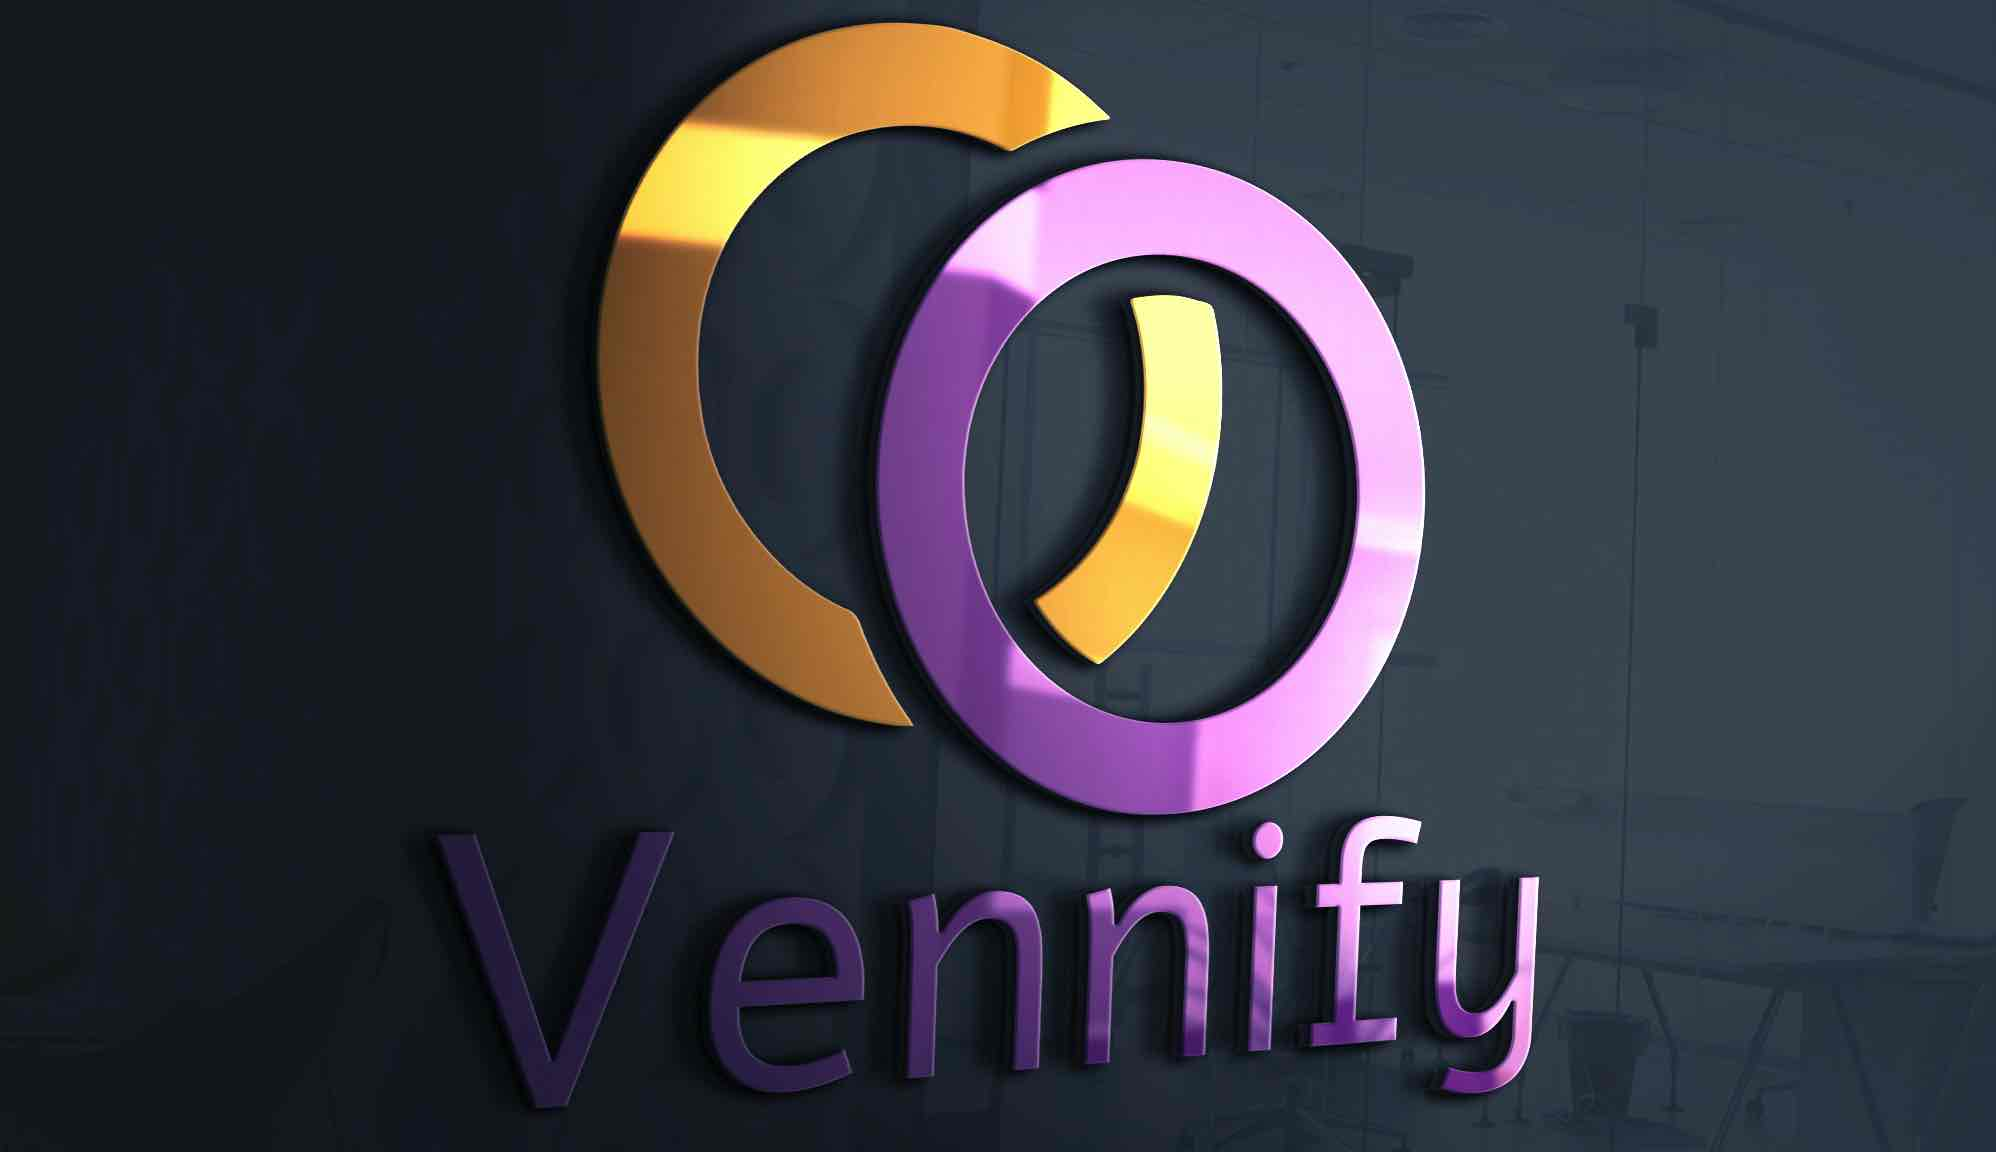

By Eric Fillion @ [Vennify.ai](https://www.vennify.ai/)

## Installation

In [1]:
pip install happytransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install datasets

## Model

In [3]:
pip install happytransformer

In [4]:
from happytransformer import HappyTextToText

In [5]:
happy_tt = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


## Data Collection  

In [6]:
from datasets import load_dataset

In [7]:
train_dataset = load_dataset("jfleg", split='validation[:]')

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

In [8]:
eval_dataset = load_dataset("jfleg", split='test[:]')

## Data Examination  

In [9]:
for case in train_dataset["corrections"][:2]:
  print(case)
  print(case[0])
  print("--------------------------------------------------------")


['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
--------------------------------------------------------
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 
--------------------------------------------------------


## Data Preprocessing   

In [10]:
import csv

In [11]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = "grammar: " + case["sentence"]
            for correction in case["corrections"]:
                # a few of the cases are blank strings. So we'll skip them
                if input_text and correction:
                    writter.writerow([input_text, correction])


In [12]:
generate_csv("jfleg_train.csv", train_dataset)
# generate_csv("eval.csv", eval_dataset)

## Before Training Evaluating

In [13]:
before_result = happy_tt.eval("eval.csv")

FileNotFoundError: ignored

In [14]:
print("Before loss: ", before_result.loss)

NameError: ignored

## Train

In [15]:
from happytransformer import TTTrainArgs

In [16]:
args = TTTrainArgs(batch_size=8)

In [17]:
happy_tt.train("train.csv", args=args)

FileNotFoundError: ignored

## After Training Evaluating

In [ ]:
after_result = happy_tt.eval("eval.csv")

08/18/2021 01:22:50 - INFO - happytransformer.happy_transformer -   Preprocessing evaluating data...


  0%|          | 0/3 [00:00<?, ?ba/s]

PyTorch: setting up devices
***** Running Evaluation *****
  Num examples = 2988
  Batch size = 1


In [ ]:
print("After loss:", after_result.loss)

After loss: 0.451170414686203


## Inference

In [ ]:
from happytransformer import TTSettings


In [ ]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=20)

### Example 1

In [ ]:
example_1 = "This sentences, has bads grammar and spelling!"

In [ ]:
result_1 = happy_tt.generate_text(example_1, args=beam_settings)
print(result_1.text)

This sentence has bad grammar and spelling!


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


### Example 2

In [ ]:
example_2 = "I am enjoys, writtings articles ons AI."

In [ ]:
result_2 = happy_tt.generate_text(example_2, args=beam_settings)
print(result_2.text)

I enjoy writing articles on AI.


## Data Preprocessing

In [ ]:
replacements = [
  (" .", "."),
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", "!"),
  (" ;", "!"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("1 7-5 0", "1750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("1 0", "10"),
  ('" ballast water', '"ballast water')

]

In [ ]:
def remove_excess_spaces(text):
  for rep in replacements:
    text = text.replace(rep[0], rep[1])

  return text

In [ ]:
remove_excess_spaces("Hi , your seat number is 5 5 .")

'Hi, your seat number is 55.'

In [ ]:
def generate_csv_updated(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = "grammar: " + case["sentence"]
            for correction in case["corrections"]:
                # a few of the cases are blank strings. So we'll skip them
                if input_text and correction:
                  input_text = remove_excess_spaces(input_text)
                  correction = remove_excess_spaces(correction)
                  writter.writerow([input_text, correction])

In [ ]:
 generate_csv_updated("train_2.csv", train_dataset)

## Pretrained Model

In [ ]:
happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")

https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp0um7stoo


Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/b8024a4f1b2fa6d7cf28f3c534358586d43cb7595e39b11bf558905f2790ea0c.0433a1687f5de97fb7c003699fe7c8d5449f28334e0509241779b920173f4ad7
creating metadata file for /root/.cache/huggingface/transformers/b8024a4f1b2fa6d7cf28f3c534358586d43cb7595e39b11bf558905f2790ea0c.0433a1687f5de97fb7c003699fe7c8d5449f28334e0509241779b920173f4ad7
loading configuration file https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/b8024a4f1b2fa6d7cf28f3c534358586d43cb7595e39b11bf558905f2790ea0c.0433a1687f5de97fb7c003699fe7c8d5449f28334e0509241779b920173f4ad7
Model config T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "fee

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/c7ca604aa817a6ca7f7d6fa4dc0fd73a1ce5cc0d46c55024a4bd440f0a5e8ff1.f53d02421d8b2746cbd27189bbbf75e80717e92ffcc646f7c86092474c31043b
creating metadata file for /root/.cache/huggingface/transformers/c7ca604aa817a6ca7f7d6fa4dc0fd73a1ce5cc0d46c55024a4bd440f0a5e8ff1.f53d02421d8b2746cbd27189bbbf75e80717e92ffcc646f7c86092474c31043b
loading weights file https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/c7ca604aa817a6ca7f7d6fa4dc0fd73a1ce5cc0d46c55024a4bd440f0a5e8ff1.f53d02421d8b2746cbd27189bbbf75e80717e92ffcc646f7c86092474c31043b
All model checkpoint weights were used when initializing T5ForConditionalGeneration.

All the weights of T5ForConditionalGeneration were initialized from the model checkpoint at vennify/t5-base-grammar-correction.
If your task is simila

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/f71cb5195a493ab4c344b6fb8f158e18384d81d6cd18884221bd00746e53fd46.6f80f46088ffac2a8f61f3cbda0f9d0bd40e0c989dc40ee63d01cb25cc105aa8
creating metadata file for /root/.cache/huggingface/transformers/f71cb5195a493ab4c344b6fb8f158e18384d81d6cd18884221bd00746e53fd46.6f80f46088ffac2a8f61f3cbda0f9d0bd40e0c989dc40ee63d01cb25cc105aa8
https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/spiece.model not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmphwgkvvoq


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/spiece.model in cache at /root/.cache/huggingface/transformers/e3a77ea58e0241f9d2e819647b964c4a997acd54522c6c12552cd9970e57687a.d6f0605ae3d57070be74b4c12206072ab332922acff822e6b5458691dbda7551
creating metadata file for /root/.cache/huggingface/transformers/e3a77ea58e0241f9d2e819647b964c4a997acd54522c6c12552cd9970e57687a.d6f0605ae3d57070be74b4c12206072ab332922acff822e6b5458691dbda7551
https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpgaaym_0c


Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/986816064146207c122899bec5d75d10c6e8f3f47e6438056fb448f0c626a700.9d3c2545d152ced836d869f7d99080767f00ce5011f953f2c06baec5e2ee0c40
creating metadata file for /root/.cache/huggingface/transformers/986816064146207c122899bec5d75d10c6e8f3f47e6438056fb448f0c626a700.9d3c2545d152ced836d869f7d99080767f00ce5011f953f2c06baec5e2ee0c40
https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp7pw0yomo


Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

storing https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/611d3f9601141f239482ea797eb43f107d840520c807ac0078e04c5719c0908e.c94798918c92ded6aeef2d2f0e666d2cc4145eca1aa6e1336fde07f2e13e2f46
creating metadata file for /root/.cache/huggingface/transformers/611d3f9601141f239482ea797eb43f107d840520c807ac0078e04c5719c0908e.c94798918c92ded6aeef2d2f0e666d2cc4145eca1aa6e1336fde07f2e13e2f46
loading file https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/spiece.model from cache at /root/.cache/huggingface/transformers/e3a77ea58e0241f9d2e819647b964c4a997acd54522c6c12552cd9970e57687a.d6f0605ae3d57070be74b4c12206072ab332922acff822e6b5458691dbda7551
loading file https://huggingface.co/vennify/t5-base-grammar-correction/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/986816064146207c122899bec5d75d10c6e8f3f47e6438056fb448f0c626a700.9d3c2545d152ced836d869f7d99

In [ ]:
result = happy_tt.generate_text("grammar: I boughts ten apple.", args=beam_settings)
print(result.text)

I bought ten apples.
